In [1]:
from scripts.read_data import load_dataset

In [2]:
df = load_dataset("Bank Customer Churn Prediction.csv")

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Checking For Missing Values

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


We can see that there are no missing values

### Summary Statistics
Understanding the distribution and charachteristics of the data
- Central tendency (Mean, Median, Mode)
- Dispresion (Standard deviation, Variance, Range)
- Percentiles (Min, Max, Quartiles)
- Skewness & Kurtosis

In [7]:
summ_statistics = df.describe()

summ_statistics

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- High std in estimated_salary suggesting either extreme variation in these values or incorect formating.
- Distribution for credit score looks fine but we should check if few customers have very low credit scores which may contribute to churn.
- The age distributions looks realistic, max value 92 implies the presence of very old customers which might be interesting to analyze.
- Balance , min value 0 suggests the presence of customers that only keep accounts for transacations not savings, high std suggests a wide range of account balances.
- Churn , mean ~ 20% , the data set is imbalanced.
- products_number , likely most customers have 1 0r 2 products and very few have 3 or 4.

### Vizualizing Distributions

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.save_utils import save_fig

<function matplotlib.pyplot.show(close=None, block=None)>

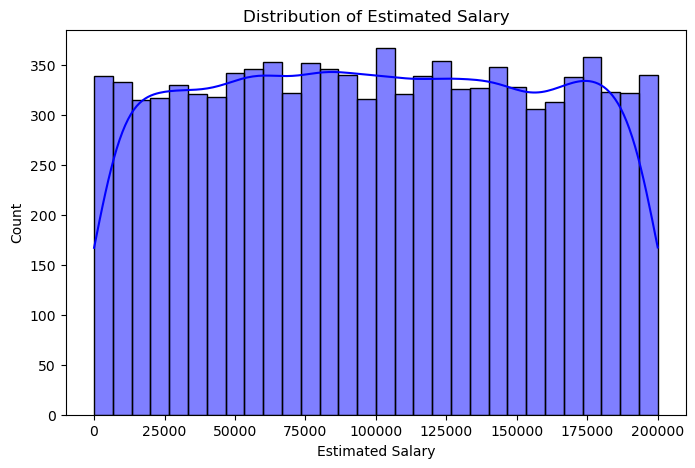

In [11]:
plt.figure(figsize=(8, 5)) 
sns.histplot(df['estimated_salary'], bins=30, kde=True, color='blue')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.title('Distribution of Estimated Salary')
save_fig("eda-distribution-of-estimated-salary")
plt.show

- Distribution is almost unifrom across all salary ranges, salaries evenly spread. The graph confirms that the values are naturally spread.

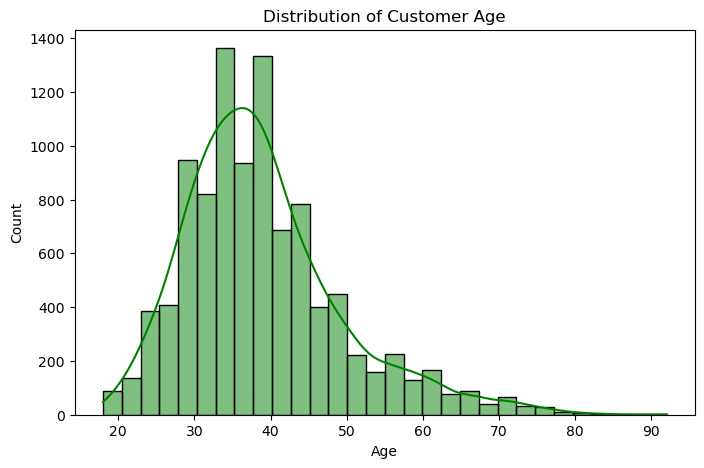

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True, color='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Age')
save_fig("eda-distribution-of-customer-age")
plt.show()

- distribution right-skewed
- bank has mostly young customers, maybe older ones are more likely to churn

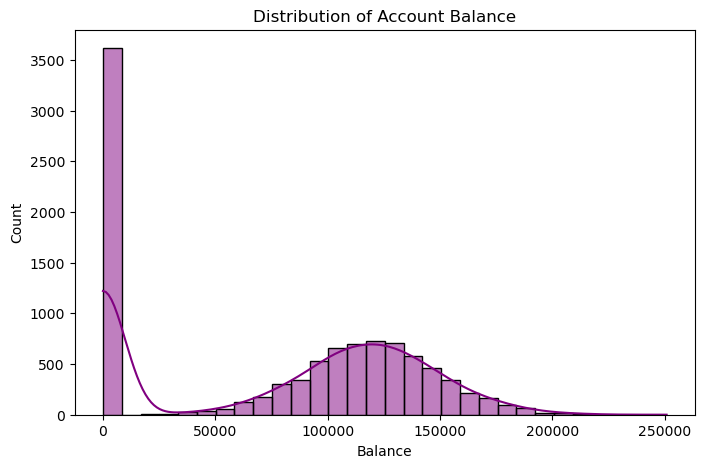

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['balance'], bins=30, kde=True, color='purple')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Distribution of Account Balance')
save_fig("eda-distribution-of-account-balance")
plt.show()

- we can see a spike at balance = 0 , meaning that a lot of customers have a balance 0 and do not keep money in their acc. Maybe this can be linked to the activity of customers and churners comparing balance distribution for churn bs non-churn.

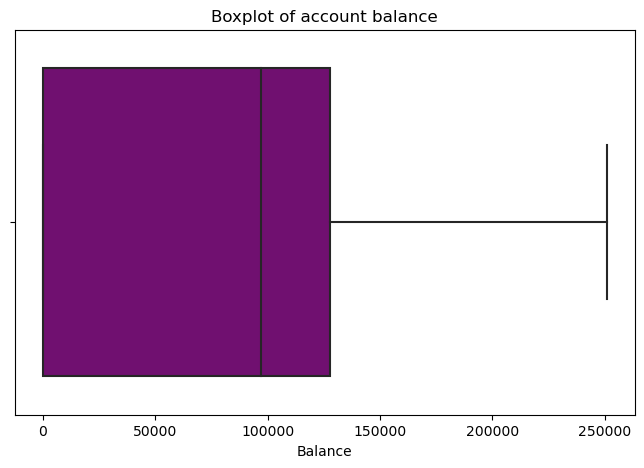

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['balance'], color='purple')
plt.xlabel('Balance')
plt.title('Boxplot of account balance')
save_fig("eda-boxplot-of-account-balance")
plt.show()

- large spread
- high median (100000)
- spike at 0 confirms most do not keep money in their balance
- it would be good to analyze churn rates for customers with acc 0 and high balances


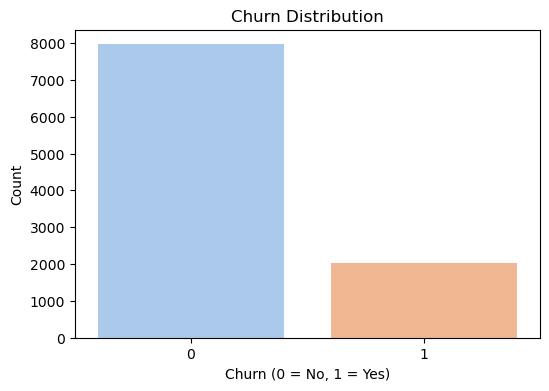

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['churn'], palette='pastel')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Churn Distribution')
save_fig("eda-churn-distribution")
plt.show()

- imbalance should be handled

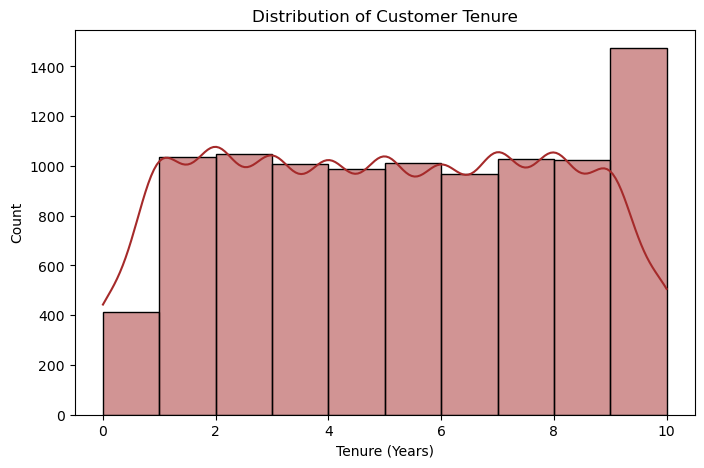

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['tenure'], bins=10, kde=True, color='brown')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.title('Distribution of Customer Tenure')
save_fig("eda-distribution-of-tenure")
plt.show()

- evenly dist
- higher count at 10 years
- hyp: customers who stay longer are less likely to chunr (to be confirmed)

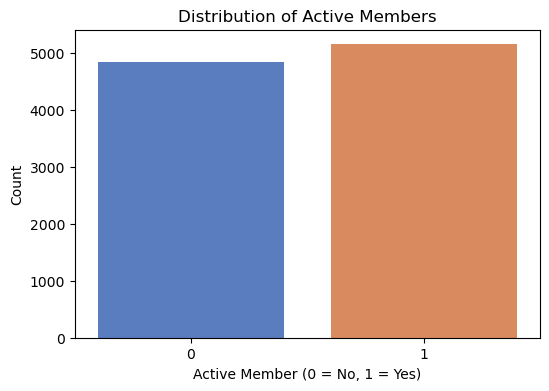

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['active_member'], palette='muted')
plt.xlabel('Active Member (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Active Members')
save_fig("eda-distribution-of-active-members")
plt.show()

- almost equal split ( 1 and 0 )
- we must check if inactive customers are likely to churn since they are almost equal to the active ones

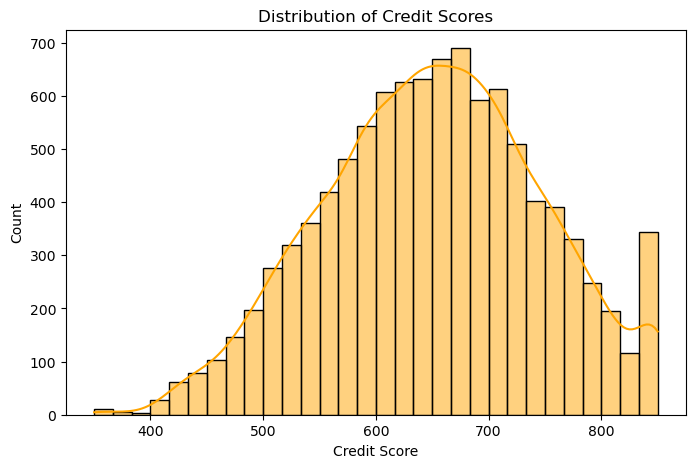

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['credit_score'], bins=30, kde=True, color='orange')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores')
save_fig("eda-distributioj-of-credit-scores")
plt.show()

- normal distributiion bell shapped (most custoemrs between 600 and 700)
- few have low scores <500  or very high >800
- low score customers might be more riskier to churb

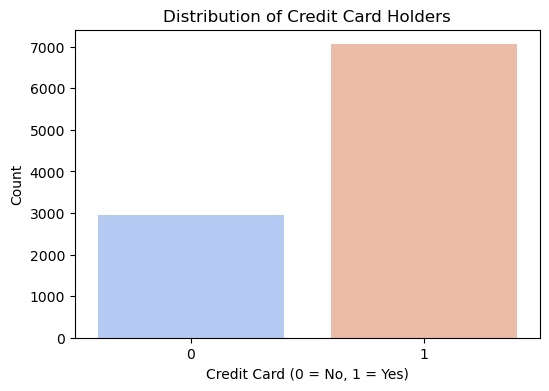

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['credit_card'], palette='coolwarm')
plt.xlabel('Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Credit Card Holders')
save_fig("eda-distribution-of-credit-card-holders")
plt.show()

- maybe there is a relation between haveing a credit card and churning

### Comparing numerical features by churn status

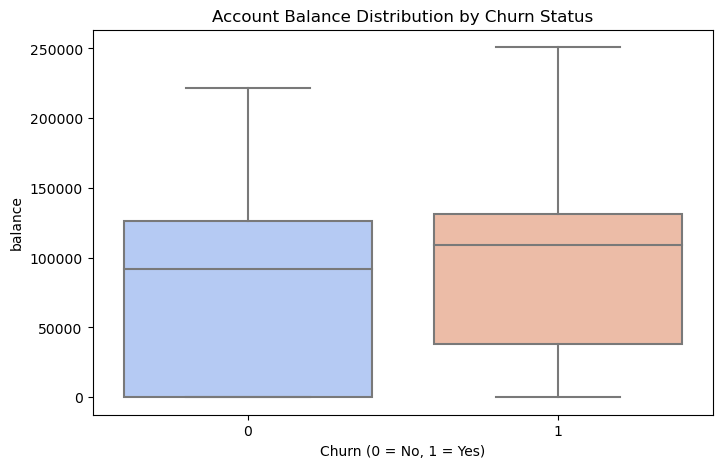

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['churn'], y=df['balance'], palette="coolwarm")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.title("Account Balance Distribution by Churn Status")
save_fig("eda-balance-by-churn-status")
plt.show()

- Similar median balances betwen 0 and 1
- churned - wider balance range
- customers with no balance exist in both groups , maybe not a key predictor, maybe needs further analysis
- balance alone does not strongly impact churn

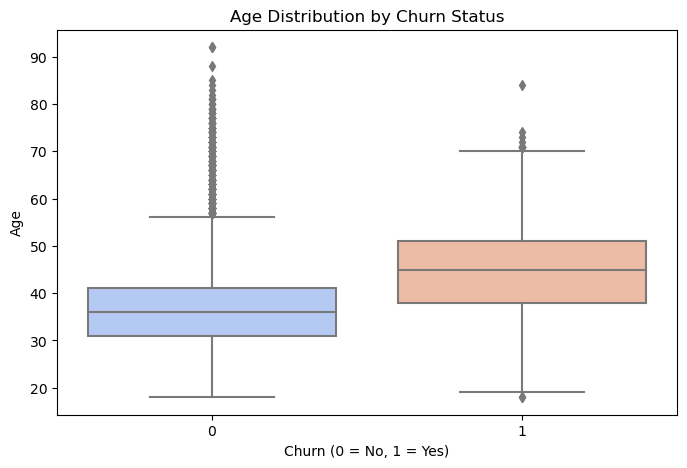

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['churn'], y=df['age'], palette="coolwarm")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.title("Age Distribution by Churn Status")
save_fig("eda-num-Age-dist-by-churn-status")
plt.show()

- churend customers are generally older (higer median age)
- more outliers in the non-churned group
- older customers more likely to churn

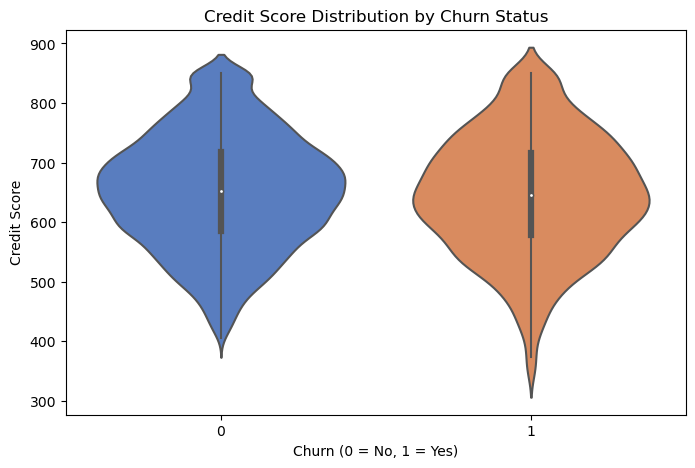

In [8]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['churn'], y=df['credit_score'], palette='muted')
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Credit Score")
plt.title("Credit Score Distribution by Churn Status")
save_fig("eda-num-credit-score-by-churn-status")
plt.show()

- similar distribution in both groups
- churned slightly lean to lower credit scores
- alone not a strong churn predictor

### Comparing Categorical Features by the Churn Status

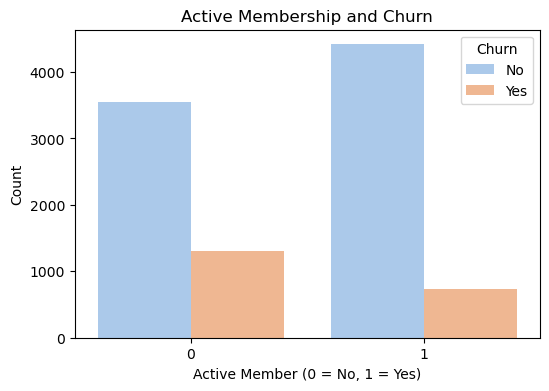

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['active_member'], hue=df['churn'], palette='pastel')
plt.xlabel("Active Member (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Active Membership and Churn")
plt.legend(title="Churn", labels=["No", "Yes"])
save_fig("eda-cat-active-memb-churn")
plt.show()

- inactive cusotmers churn more
- inactive customers are at highr riks

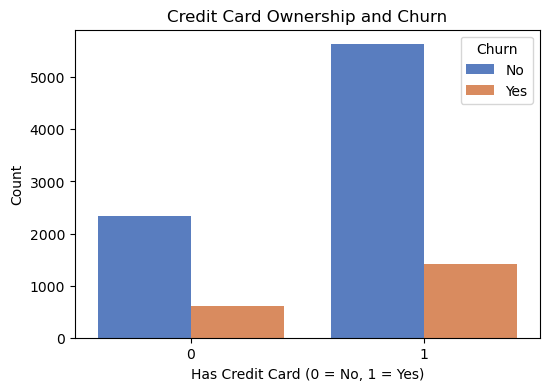

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['credit_card'], hue=df['churn'], palette='muted')
plt.xlabel("Has Credit Card (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Credit Card Ownership and Churn")
plt.legend(title="Churn", labels=["No", "Yes"])
save_fig("eda-cat-credit-card-own-churn")
plt.show()

- does not significantly impact churn
- the churn is similar to both groups

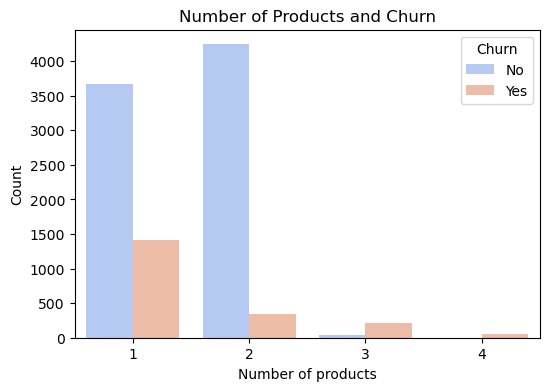

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['products_number'], hue=df['churn'], palette='coolwarm')
plt.xlabel("Number of products")
plt.ylabel("Count")
plt.title("Number of Products and Churn")
plt.legend(title="Churn", labels=["No", "Yes"])
save_fig("eda-cat-no-of-products-and-churn")
plt.show()

- customers with 1 product churn more
- with 3 or 4 products less churners

### Correlation Analysis

In [4]:
import numpy as np

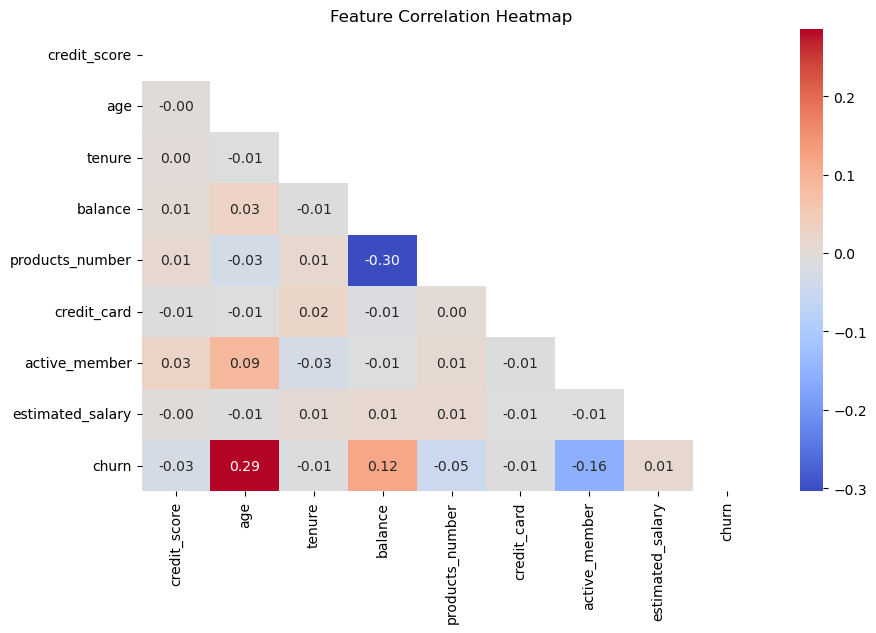

In [21]:
plt.figure(figsize=(10, 6))
corr = df.drop(columns=['customer_id']).corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap="coolwarm", mask=mask, fmt=".2f")
plt.title("Feature Correlation Heatmap")
save_fig("eda-corr-matrix-heatmap")
plt.show()

- age highest positive correlation (older customers churn more)
- active memeber stronger negative correlation , inactice customers are more likely to churn

**Analyzing Age and Active Membership Totgether**

In [22]:
import pandas as pd
#Age groups
bins = [18, 30, 45, 60, 75, 100]
labels = ['18-30', '30-45', '45-60', '60-75', '75+']
ndf = df.copy()
ndf['age_group'] = pd.cut(ndf['age'], bins=bins, labels=labels)

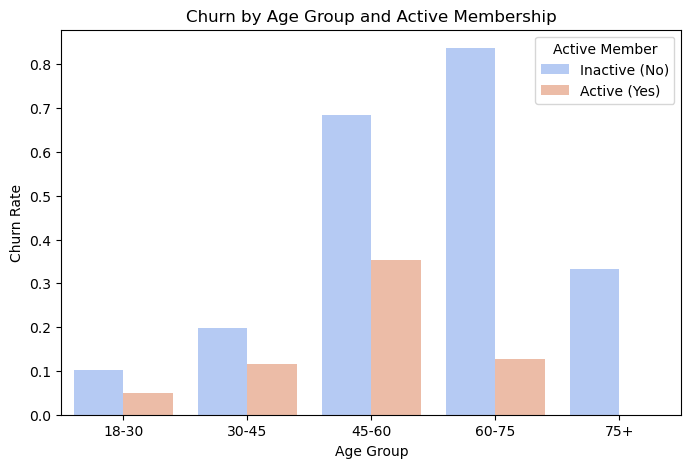

In [32]:
grouped_ndf = ndf.groupby(['age_group', 'active_member'])['churn'].mean().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='age_group',y='churn', hue='active_member',data=grouped_ndf, palette='coolwarm')
legend_labels = ['Inactive (No)', 'Active (Yes)']
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, legend_labels, title="Active Member")
plt.xlabel("Age Group")
plt.ylabel("Churn Rate")
plt.title("Churn by Age Group and Active Membership")
save_fig("eda-cat-churn-by-age-group-active-memb")
plt.show()

**Products Number and Balance**
Lets see if customers with high  balance and fewer products are more likely to leave.

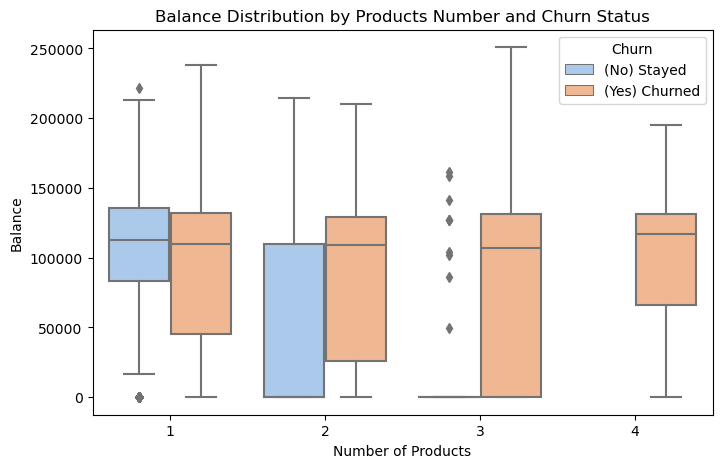

In [35]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x=df['products_number'], y=df['balance'], hue=df['churn'], palette='pastel')
legend_labels = ['(No) Stayed ', '(Yes) Churned']
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, legend_labels, title="Churn")
plt.xlabel("Number of Products")
plt.ylabel("Balance")
plt.title("Balance Distribution by Products Number and Churn Status")

plt.show()

**Interaction Between Tenure and Credit Score**


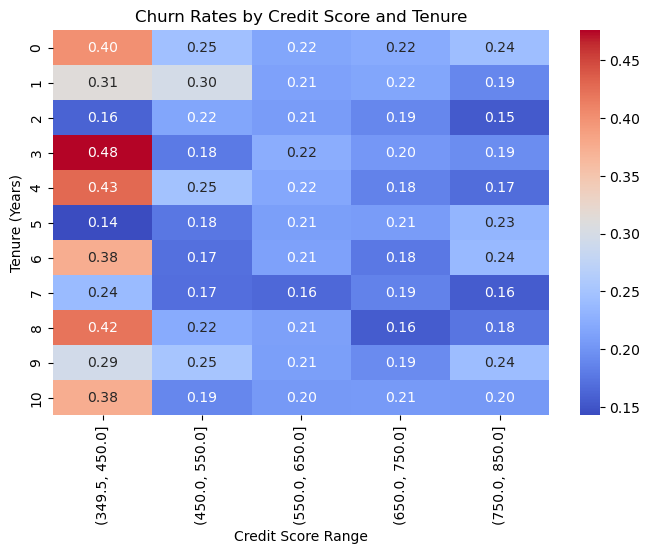

In [37]:
plt.figure(figsize=(8, 5))
pivot_table = df.pivot_table(values='churn', index='tenure', columns=pd.cut(df['credit_score'], bins=5), aggfunc=np.mean)
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".2f")
plt.xlabel("Credit Score Range")
plt.ylabel("Tenure (Years)")
plt.title("Churn Rates by Credit Score and Tenure")
plt.show()

**Churn Rate by Tenure and Balance**

In [6]:
import pandas as pd

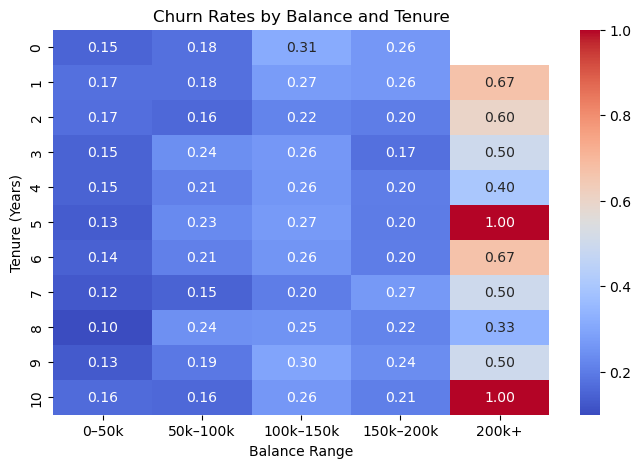

In [13]:
bins = [0, 50000, 100000, 150000, 200000, df['balance'].max()]
labels = ['0–50k', '50k–100k', '100k–150k', '150k–200k', '200k+']
balance_bins = pd.cut(df['balance'], bins=bins, labels=labels, include_lowest=True)
pivot_table = df.pivot_table(values='churn', index='tenure', columns=balance_bins, aggfunc=np.mean)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".2f")
plt.xlabel("Balance Range")
plt.ylabel("Tenure (Years)")
plt.title("Churn Rates by Balance and Tenure")
save_fig("eda-cat-churn-balance-tenure")
plt.show()

- regardless of tenure, customer with highh balances over 200k have very high churn rates (tenure = 1 -> churn = 0.67, tenure = 2 -> churn = 1.0, tenure = 10 -> churn = 1.0)
- in general churn is higher for short-tenure customer wiht 0-2 years, those being light blue suggests they are in medium to high risk of churn.
- lowest churn is for customers with balances of 0-50k
- mid range 50-150 k have moderate risk of churn, which drops slightly with tenure

**Churn Rate by Card Ownership and Active Membership**

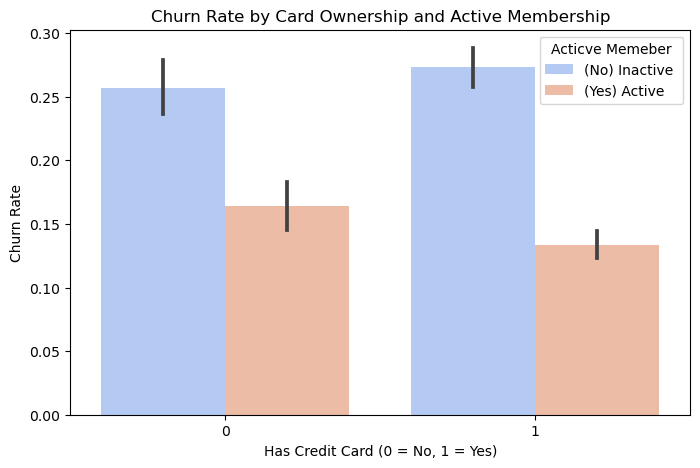

In [11]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='credit_card', y='churn', hue='active_member', data=df, palette='coolwarm')
legend_labels = ['(No) Inactive ', '(Yes) Active']
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, legend_labels, title="Acticve Memeber")
plt.xlabel("Has Credit Card (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Card Ownership and Active Membership")
save_fig("eda-cat-churn-creditcard-active-memb")
plt.show()

- inactive members have higher churn rates regardless the card ownership
- less churners in active members group who own a credit card
- (being active may be more important to predict churn than owning a credit card)

**Churn Rate by Products Number and Active Membership**

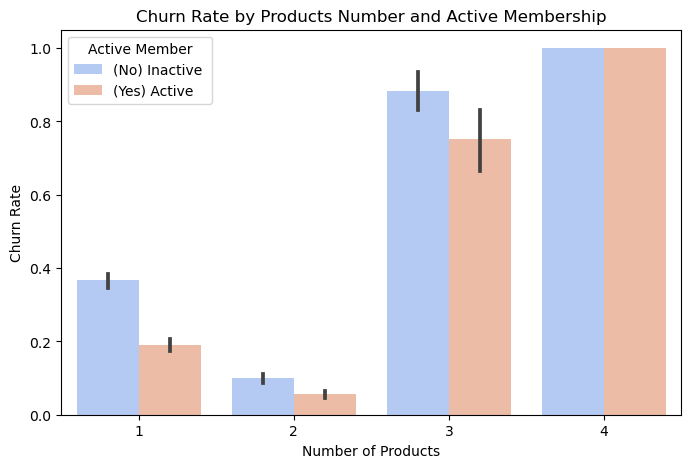

In [12]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='products_number', y='churn', hue='active_member', data=df, palette='coolwarm')
legend_labels = ['(No) Inactive ', '(Yes) Active']
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, legend_labels, title="Active Member")
plt.xlabel("Number of Products")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Products Number and Active Membership")
plt.show()

- for 1 product churn rate is lower for both active and inacative members and drops significally in customers active and inactive who have 2 products
- but for customers with 3+ products it increases sharply for both active and inactive members. (Creates a spike)

#### Key Insights

|Feature|Insight|
|-------|-------|
|**Age**|Strong positive correlation (0.29), indicating older customers churn more|
|**Credit Score**|There is a slight churn rate difference at lower scores, but there is no strong pattern|
|**Estimated Salary**|No meaningful impact|
|**Active Member**|Inactive memebers are more likely to churn(corr ~ -0.16)|
|**Number of Products**|1-product customers churn more,2 products are more stable. Unexpectedly increases for 3-4 products|
|**Tenure**|Generally churn is reduced with longer tenure,but not universally, becasue some short-tenure customers with high balance churn a lot|
|**Credit Card**| Weak correlation with churn alone, holders which are active tend to churn a little less.|
|**Balance**|In early tenure years high balance customers can also churn. Low balance customers are more stable|

#### Feature Combinations
- **Age and Active Memebership** : 
    - Young active memebers have the lowest churn
    - Older inactive members have the highest churn rate
- **Balance and Tenure (Heatmap)** :
    - Higher churn rates in cusotmers with high-balances and short tenure
    - The most loyal groups are the ones with long-tenure, low-balance
- **Credit Card and Active Membership** :
    - Inactive customers churn more regardless of credit card ownership.
    - Credit Card ownership only affects slightly the customers who are active
- **Products Number and Active Membership** : 
    - Churn is high for customers who have 1 product and are inactive
    - There is a spike in churn rates for products with 3 or 4 products

#### Most Important Features based on perforemd exploratory data analysis
- Age
- Active Membership
- Number of Products
- Balance (good combination with Tenure)